# LGMVIP Jan23 Data Science Intership Task 1

1.import dataset 

2.visulizing the dataset

3.Data preparation

4.Training and Testting 

5.Making Prediction 

6.Moderl Evolution

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [2]:
data=pd.read_csv("D:\\All Data\\iris.csv")

In [3]:
data.head()

,sepal.length,sepal.width,petal.length,petal.width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
data.tail()

,sepal.length,sepal.width,petal.length,petal.width,Species
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [5]:
data.shape

(150, 5)

In [6]:
data.size

750

In [7]:
type(data)

pandas.core.frame.DataFrame

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
data.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
data.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
Species         0
dtype: int64

In [11]:
data.dtypes

sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
Species          object
dtype: object

In [12]:
df=data.groupby("Species")

In [13]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
50,7.0,3.2,4.7,1.4,Versicolor
51,6.4,3.2,4.5,1.5,Versicolor
52,6.9,3.1,4.9,1.5,Versicolor
53,5.5,2.3,4.0,1.3,Versicolor
54,6.5,2.8,4.6,1.5,Versicolor


In [14]:
data["Species"].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

# 2. Visualizing the dataset

{'whiskers': [<matplotlib.lines.Line2D at 0x27636b95c10>,
 'caps': [<matplotlib.lines.Line2D at 0x27636bb02b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x27636b957c0>],
 'medians': [<matplotlib.lines.Line2D at 0x27636bb09d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x27636bb0d60>],
 'means': []}

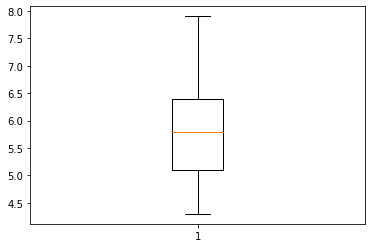

In [15]:
plt.boxplot(data["sepal.length"])

{'whiskers': [<matplotlib.lines.Line2D at 0x2763733cdc0>,
 'caps': [<matplotlib.lines.Line2D at 0x2763734c520>,
 'boxes': [<matplotlib.lines.Line2D at 0x2763733ca30>],
 'medians': [<matplotlib.lines.Line2D at 0x2763734cc40>],
 'fliers': [<matplotlib.lines.Line2D at 0x2763734cfd0>],
 'means': []}

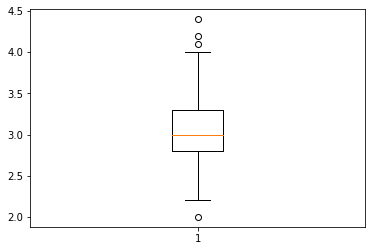

In [16]:
plt.boxplot(data["sepal.width"])

{'whiskers': [<matplotlib.lines.Line2D at 0x276373abc40>,
 'caps': [<matplotlib.lines.Line2D at 0x276373ba3a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x276373ab8b0>],
 'medians': [<matplotlib.lines.Line2D at 0x276373baac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x276373bae50>],
 'means': []}

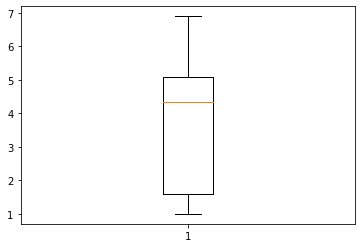

In [17]:
plt.boxplot(data["petal.length"])

{'whiskers': [<matplotlib.lines.Line2D at 0x27637426190>,
 'caps': [<matplotlib.lines.Line2D at 0x27637426850>,
 'boxes': [<matplotlib.lines.Line2D at 0x27637415dc0>],
 'medians': [<matplotlib.lines.Line2D at 0x27637426f70>],
 'fliers': [<matplotlib.lines.Line2D at 0x27637432340>],
 'means': []}

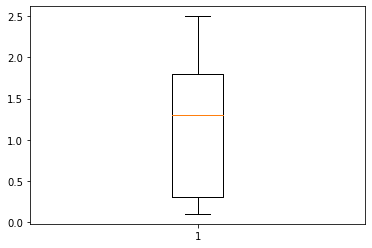

In [18]:
plt.boxplot(data["petal.width"])

<AxesSubplot:>

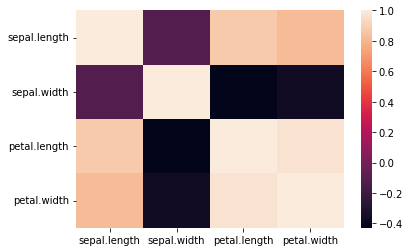

In [19]:
sns.heatmap(data.corr())

# Data Preparation

In [20]:
sp={ "Setosa":1, "Versicolor":2, "Virginica":3}
data.Species=[sp[i] for i in data.Species]
data

,sepal.length,sepal.width,petal.length,petal.width,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [21]:
x=data.iloc[:,0:4]

In [22]:
x

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [23]:
y=data.iloc[:,4]

In [24]:
y

0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: Species, Length: 150, dtype: int64

# Traning Model

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=50)

In [26]:
model=LinearRegression()

In [27]:
model.fit(x , y)

LinearRegression()

In [28]:
model.score(x,y) #coef of prediction.......

0.9303939218549564

In [29]:
model.coef_

array([-0.11190585, -0.04007949,  0.22864503,  0.60925205])

In [30]:
model.intercept_

1.186495247206249

# Making Prediction

In [31]:
y_pred=model.predict(x_test)
y_pred

array([2.16905629, 2.41552837, 0.95648034, 0.966833  , 2.74632699,
       3.0550967 , 2.81016241, 1.17683566, 0.91013693, 2.34728479,
       0.94432309, 2.79848293, 0.97872811, 2.84227394, 2.25733961,
       0.99440997, 2.05204475, 0.90991807, 1.93006094, 2.49544119,
       3.24422636, 2.01385065, 0.77334779, 2.83196924, 2.30098933,
       3.19954392, 2.39866098, 2.31252984, 2.15164973, 3.04756647])

# Model Evolution 
 Mean Squred Error : 0.04